In [106]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
%config InlineBackend.figure_format = "retina"

In [144]:
path_base = "./results"
experiment_names = [f for f in os.listdir(path_base) if ("-target" in f) and ("p-error" in f)]
sorted(experiment_names)

['concrete-target-p-error00.pkl',
 'concrete-target-p-error05.pkl',
 'concrete-target-p-error10.pkl',
 'concrete-target-p-error15.pkl',
 'concrete-target-p-error20.pkl',
 'concrete-target-p-error25.pkl',
 'concrete-target-p-error30.pkl',
 'concrete-target-p-error35.pkl',
 'concrete-target-p-error40.pkl',
 'concrete-target-p-error45.pkl',
 'concrete-target-p-error50.pkl']

In [145]:
df_all = []
for file in experiment_names:
    with open(os.path.join(path_base, file), "rb") as f:
        res = pickle.load(f)
    
    errors = res["methods"]
    for method in errors:
        part = np.sqrt(errors[method].median(axis=0))
        part.name  = "RMedSE"
        part = pd.DataFrame(part)
        part["method"] = method
        part["p_error"] = res["config"]["p_error"]
        
        df_all.append(part)
df_all = pd.concat(df_all, axis=0)

In [146]:
df_all.head()

,RMedSE,method,p_error
0,0.153738,WLF-IMQ,0.3
1,0.152502,WLF-IMQ,0.3
2,0.146112,WLF-IMQ,0.3
3,0.156974,WLF-IMQ,0.3
4,0.173591,WLF-IMQ,0.3


In [147]:
void_methods = ["EKF", "OGD"]

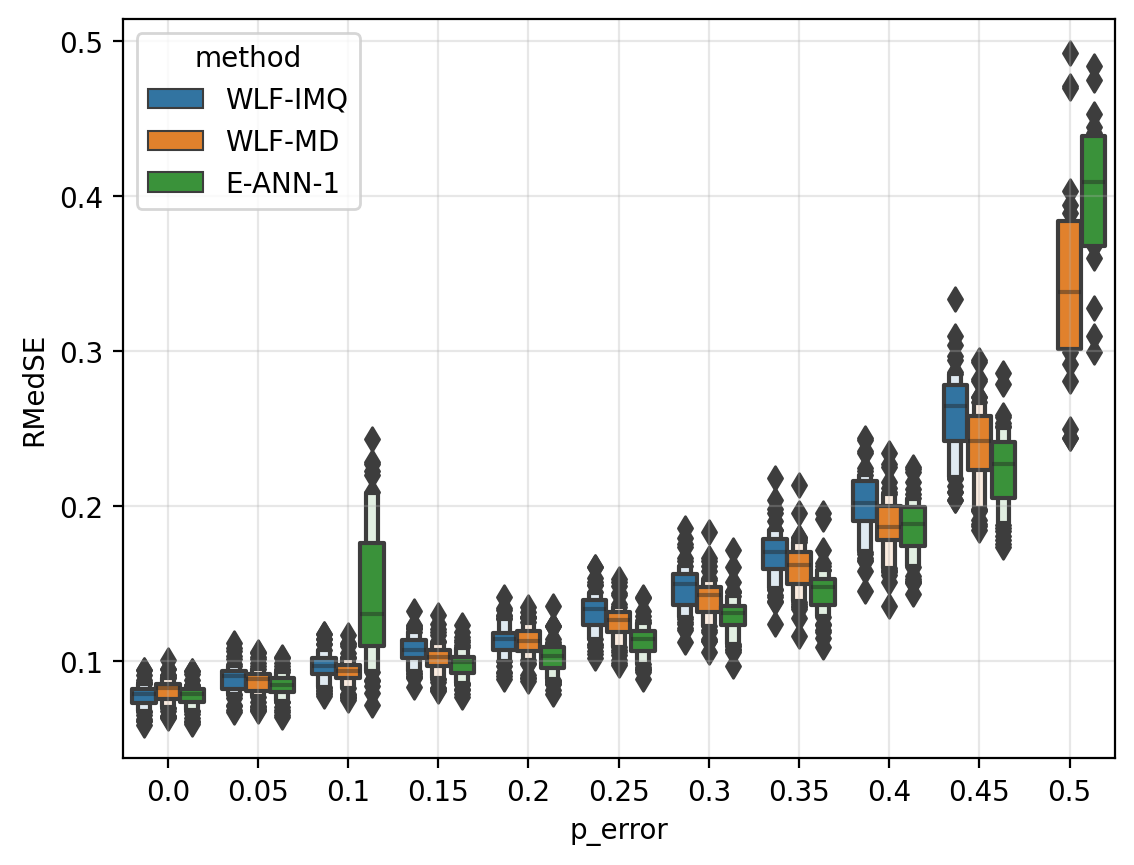

In [148]:
methods = sorted(df_all.method.unique())
sns.boxenplot(
    x="p_error", hue="method", y="RMedSE",
    data=df_all.query("RMedSE < 0.5").query("method not in @void_methods"),
    # hue_order=methods
)
plt.grid(alpha=0.3)